<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 04. PyTorch Custom Datasets Video Notebook



### 0. Importing Pytorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.9.0+cu126'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Thu Jan  8 17:14:07 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 1. Get Data

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


### 2. Data preparation

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza.


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/pizza/2124579.jpg
Image class: pizza
Image height: 384
Image width: 512


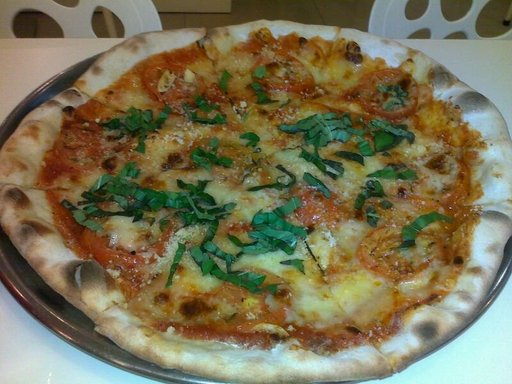

In [10]:
import random
from PIL import Image

# Set seed
random.seed(42)

#1. Get all the imagepath
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. Get random image path
random_image_path = random.choice(image_path_list)

# Get the image class from path name
image_class = random_image_path.parent.stem

#4. Open image
img= Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

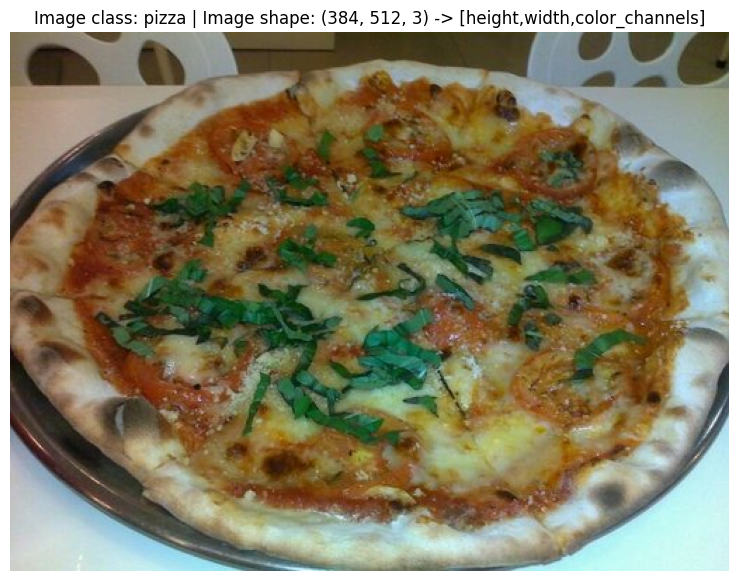

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Trun the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height,width,color_channels]")
plt.axis(False);

array([[[125, 112,  80],
        [127, 114,  82],
        [129, 115,  86],
        ...,
        [ 55,  53,  12],
        [ 57,  55,  16],
        [ 57,  55,  16]],

       [[125, 112,  80],
        [127, 114,  82],
        [129, 115,  86],
        ...,
        [ 55,  53,  14],
        [ 59,  57,  19],
        [ 63,  61,  23]],

       [[125, 111,  82],
        [127, 113,  84],
        [128, 114,  85],
        ...,
        [ 53,  50,  15],
        [ 60,  57,  22],
        [ 70,  67,  32]],

       ...,

       [[206, 207, 202],
        [206, 207, 202],
        [207, 208, 202],
        ...,
        [213, 247, 246],
        [212, 246, 245],
        [211, 245, 244]],

       [[206, 207, 201],
        [206, 207, 201],
        [207, 208, 202],
        ...,
        [212, 246, 245],
        [211, 245, 244],
        [210, 244, 243]],

       [[206, 207, 201],
        [206, 207, 201],
        [207, 208, 202],
        ...,
        [210, 244, 243],
        [209, 243, 242],
        [208, 242, 241]]], dtype=uint8)
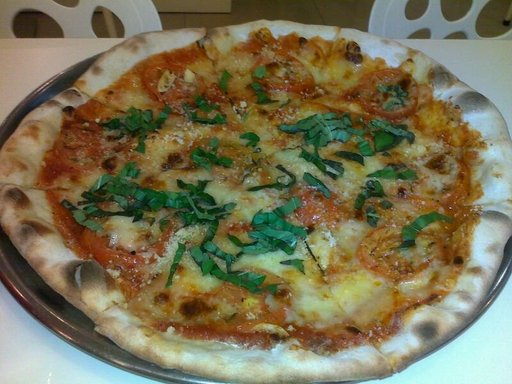

In [13]:
img_as_array

### 3. Transforming Data

Before we can use our data with Pytorch.

1. Turn your target data into tensors(in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.Dataloader`, we'll call these `Dataset` and `Dataloader`

In [ ]:
import torch
from torch.utils.data import Dataloader